In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_regression, r_regression, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
Datos=pd.read_csv("../Life-Expectancy-Data-Updated.csv")

In [79]:
Datos

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


### Exclusion de variables

Dado que el analisis que se tiene pensado hacer es un analisis de series de tiempo multivariado para propositos de estudiar el impacto de las variables no se tomaran en cuenta 3 variables en especifico:

1: Country
2: Region
3: Year
4: Economy_status_Developed
5: Economy_status_Developing

Primeramente el año no constituye a una variable de la cual podamos deshacernos debido a que se hara un estudio de series de tiempo, debido a esto se omitira completamente de esta parte de seleccion de variables dado que podria considerarse es valida "por defecto".
En contraste las otras 4 variables constituyen a variables categoricas, las cual probablemente en un futuro reporte se usaran para analizar los resultados obtenidos pero al menos en primera instancia no cumplen con una funcion que pueda considerarse util para propositos de nuestro analisis de series de tiempo por lo cual se omitiran de este paso.

Cabe destacar que para las 5 variables seran excluidas unicamente de esta parte del estudio (i.e la seleccion de variables ) sin embargo en futuros analisis las variables no seran omitidas a menos que se de una justificacion especifica para no usarlas.

### Evaluacion de variables no omitadas

Empezaremos omitiendo del conjunto de datos las variables previamente mencionadas

In [80]:
Datos_mod=Datos.drop(columns=["Country","Region","Year","Economy_status_Developed","Economy_status_Developing"])

In [81]:
features = [col for col in Datos_mod.columns if col not in ['Life_expectancy']] 
y = Datos_mod['Life_expectancy']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), features)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('selector', SelectKBest(score_func=f_regression, k=10))
])
X = Datos_mod.drop(columns=['Life_expectancy'])
pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Infant_deaths',
                                                   'Under_five_deaths',
                                                   'Adult_mortality',
                                                   'Alcohol_consumption',
                                                   'Hepatitis_B', 'Measles',
                                                   'BMI', 'Polio', 'Diphtheria',
                                                   'Incidents_HIV',
                                                   'GDP_per_capita',
                                                   'Population_mln',
                                                   'Thinness_ten_nineteen_years',
                                                   'Thinness_five_nine_years',
                                                   'Schooling'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector',
                 SelectKBest(score_func=<function f_regression at 0x0000022BD5378040>))])

C:\Users\Victor Alanis\AppData\Local\Temp\ipykernel_59128\1554658445.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=selected_features_scores, palette='viridis')


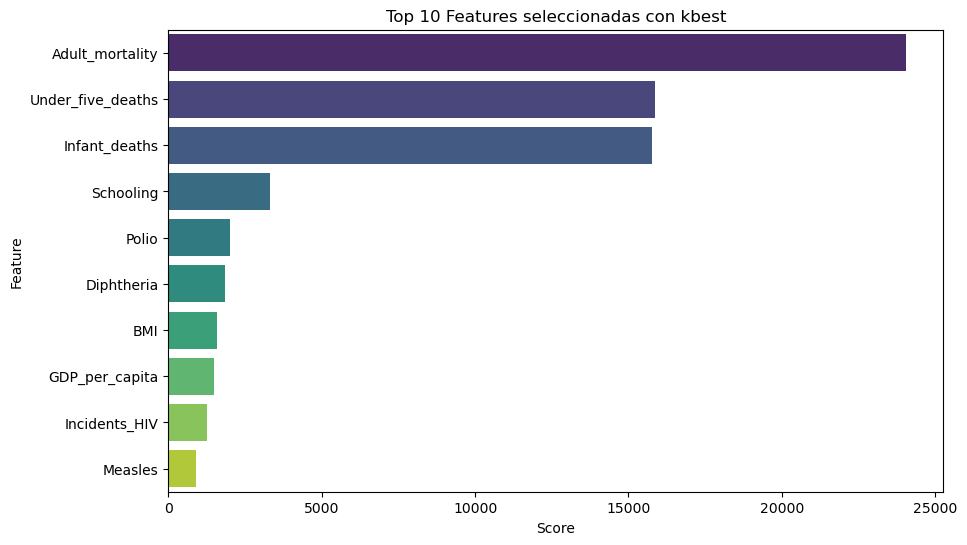

In [82]:
selected_columns_indices = pipeline.named_steps['selector'].get_support(indices=True)
selected_scores = pipeline.named_steps['selector'].scores_[selected_columns_indices]

transformed_columns = np.hstack([
    features
])

selected_features = transformed_columns[selected_columns_indices]
selected_features_scores = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})

selected_features_scores = selected_features_scores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=selected_features_scores, palette='viridis')
plt.title('Top 10 Features seleccionadas con kbest')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

Se puede apreciar como La mortalidad adulta es precisamente uno de los mejores indicadores/más correlacionado con respecto a la expectativa de vida, lo cual tiene sentido, sin embargo vamos a continuar con más pruebas para confirmar que variables pueden ser relevantes.

In [83]:
features = [col for col in Datos_mod.columns if col not in ['Life_expectancy']] 
y = Datos_mod['Life_expectancy']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), features)  
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_processed = pipeline.fit_transform(Datos_mod)

y = Datos_mod['Life_expectancy']


F, p_values = f_regression(X_processed, y)

results_df = pd.DataFrame({
    'Feature': np.array(features),
    'F-value': F,
    'p-value': p_values
})

results_df = results_df.sort_values(by='p-value')

results_df

,Feature,F-value,p-value
0,Infant_deaths,15777.939947,0.000000e+00
1,Under_five_deaths,15864.859075,0.000000e+00
2,Adult_mortality,24063.375645,0.000000e+00
7,Polio,1998.402061,0.000000e+00
14,Schooling,3313.203564,0.000000e+00
8,Diphtheria,1859.277978,1.952921e-313
6,BMI,1596.711182,7.446629e-278
10,GDP_per_capita,1474.321741,1.516751e-260
9,Incidents_HIV,1260.965065,3.628279e-229
5,Measles,904.375333,6.767819e-173


Bajo la misma linea podemos apreciar como otro indicativo importante para determinar la expectativa de vida (la cual hasta cierto punto es un indicativo de la salud generla de un pais) es precisamente la mortalidad tanto en adultos como en infantes.

Algo que encuentro relevante es el hecho de que todos los p-valores que se obtuvieron son significativamente bajos, con excepcion de la poblacion, eto podria ser un buen indicativo de que la poblacion tal vez no sea la mejor variable a estudiar para este analisis dado a su gran variacion entre paises.


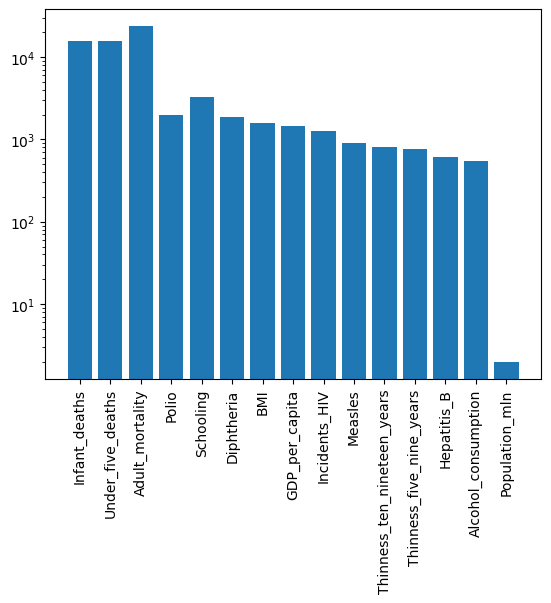

In [84]:
plt.figure()
plt.bar(results_df['Feature'], results_df['F-value'])
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()


In [85]:
r_value = r_regression(X, y)

In [86]:
results_df['r_value'] = r_value
colors = []
for v in results_df['r_value']:
    if v > 0:
        colors.append('b')
    else:
        colors.append('r')

In [87]:
results_df.reset_index(inplace=True)
results_df.drop(columns="index")

,Feature,F-value,p-value,r_value
0,Infant_deaths,15777.939947,0.000000e+00,-0.920032
1,Under_five_deaths,15864.859075,0.000000e+00,-0.920419
2,Adult_mortality,24063.375645,0.000000e+00,-0.945360
3,Polio,1998.402061,0.000000e+00,0.399159
4,Schooling,3313.203564,0.000000e+00,0.417804
5,Diphtheria,1859.277978,1.952921e-313,0.490019
6,BMI,1596.711182,7.446629e-278,0.598423
7,GDP_per_capita,1474.321741,1.516751e-260,0.641217
8,Incidents_HIV,1260.965065,3.628279e-229,0.627541
9,Measles,904.375333,6.767819e-173,-0.553027


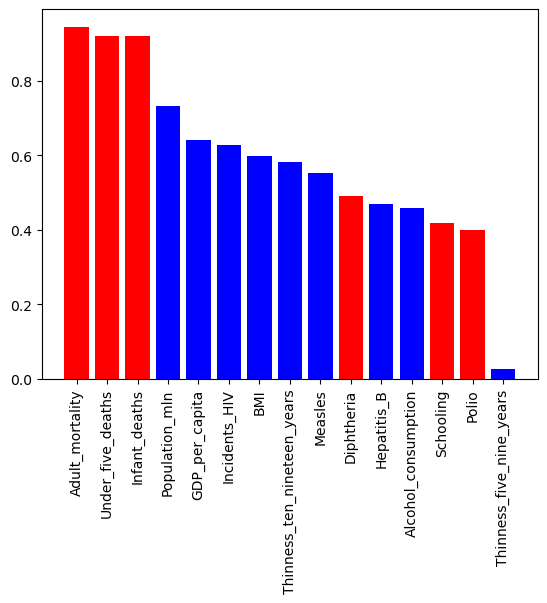

In [88]:
results_df['r_value_abs'] = results_df['r_value'].abs()
results_df.sort_values('r_value_abs', inplace = True, ascending = False)
plt.figure()
plt.bar(results_df.Feature, results_df.r_value_abs, color = colors)
plt.xticks(rotation=90)
plt.show()

Otra variable que se podria considerar eliminar es Thinness_five_nine_years dado que muy probablemente esta altamente correlacionada con la mortalidad en menores de 5 años

In [89]:
from sklearn.feature_selection import mutual_info_regression

In [90]:
mi = mutual_info_regression(X, y)
mi

array([1.20793683, 1.2334786 , 1.44885857, 0.41535339, 0.34341469,
       0.50061667, 0.65138073, 0.35180121, 0.36712812, 0.5237807 ,
       0.84587477, 0.2839608 , 0.82665785, 0.81120231, 0.7003835 ])

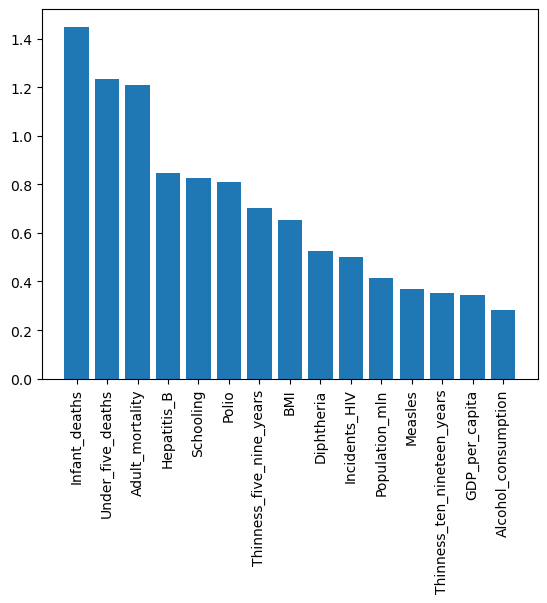

In [91]:
results_df['mi'] = mi
results_df.sort_values('mi', ascending = False, inplace = True)

plt.figure()
plt.bar(results_df.Feature, results_df.mi)
plt.xticks(rotation=90)
plt.show()

In [95]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS



Ahora vamos a aplicar un efs utlizando un regresor lineal

In [96]:
lr = LinearRegression()

efs = EFS(estimator = lr,        
          min_features = 1,      
          max_features = 10,      
          scoring = 'neg_mean_absolute_error',  
          cv = 5)

In [ ]:
efs = efs.fit(X, y)


In [100]:
print('Best accuracy score: %.2f' % efs.best_score_)
# print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

Best accuracy score: -1.09
Best subset (corresponding names): ('Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'BMI', 'Incidents_HIV', 'GDP_per_capita', 'Thinness_ten_nineteen_years', 'Schooling')


In [101]:
metric_dict = efs.get_metric_dict()
df_efs = pd.DataFrame(metric_dict).T
df_efs.sort_values('avg_score', ascending=False,  inplace = True)
df_efs_best_10 = df_efs.iloc[:10]
df_efs_best_10

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
28008,"(0, 1, 2, 3, 4, 6, 9, 10, 12, 14)","[-1.1205617608992346, -1.1068622786025009, -1....",-1.091589,"(Infant_deaths, Under_five_deaths, Adult_morta...",0.024983,0.019437,0.009719
28009,"(0, 1, 2, 3, 4, 6, 9, 10, 13, 14)","[-1.1251675470467648, -1.109524467264999, -1.0...",-1.093097,"(Infant_deaths, Under_five_deaths, Adult_morta...",0.028322,0.022035,0.011018
28006,"(0, 1, 2, 3, 4, 6, 9, 10, 11, 14)","[-1.129198450566518, -1.103029188105123, -1.06...",-1.093108,"(Infant_deaths, Under_five_deaths, Adult_morta...",0.02731,0.021248,0.010624
27985,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 12)","[-1.1232146520646065, -1.1053121560489236, -1....",-1.093129,"(Infant_deaths, Under_five_deaths, Adult_morta...",0.025911,0.02016,0.01008
22939,"(0, 1, 2, 3, 4, 6, 9, 10, 12)","[-1.1243242952008423, -1.1045867207581506, -1....",-1.093286,"(Infant_deaths, Under_five_deaths, Adult_morta...",0.026065,0.02028,0.01014
27987,"(0, 1, 2, 3, 4, 6, 8, 9, 10, 14)","[-1.1291755940466779, -1.1071329596459574, -1....",-1.09362,"(Infant_deaths, Under_five_deaths, Adult_morta...",0.028682,0.022316,0.011158
22941,"(0, 1, 2, 3, 4, 6, 9, 10, 14)","[-1.1297360136887724, -1.1066497043302017, -1....",-1.093664,"(Infant_deaths, Under_five_deaths, Adult_morta...",0.028756,0.022373,0.011187
27965,"(0, 1, 2, 3, 4, 6, 7, 9, 10, 12)","[-1.1237473932707152, -1.1073646954324594, -1....",-1.093811,"(Infant_deaths, Under_five_deaths, Adult_morta...",0.026149,0.020345,0.010172
27860,"(0, 1, 2, 3, 4, 5, 6, 9, 10, 12)","[-1.1259274211900159, -1.1054859257097833, -1....",-1.093945,"(Infant_deaths, Under_five_deaths, Adult_morta...",0.027116,0.021098,0.010549
28007,"(0, 1, 2, 3, 4, 6, 9, 10, 12, 13)","[-1.1254655086441563, -1.1045963487519264, -1....",-1.093985,"(Infant_deaths, Under_five_deaths, Adult_morta...",0.026123,0.020324,0.010162


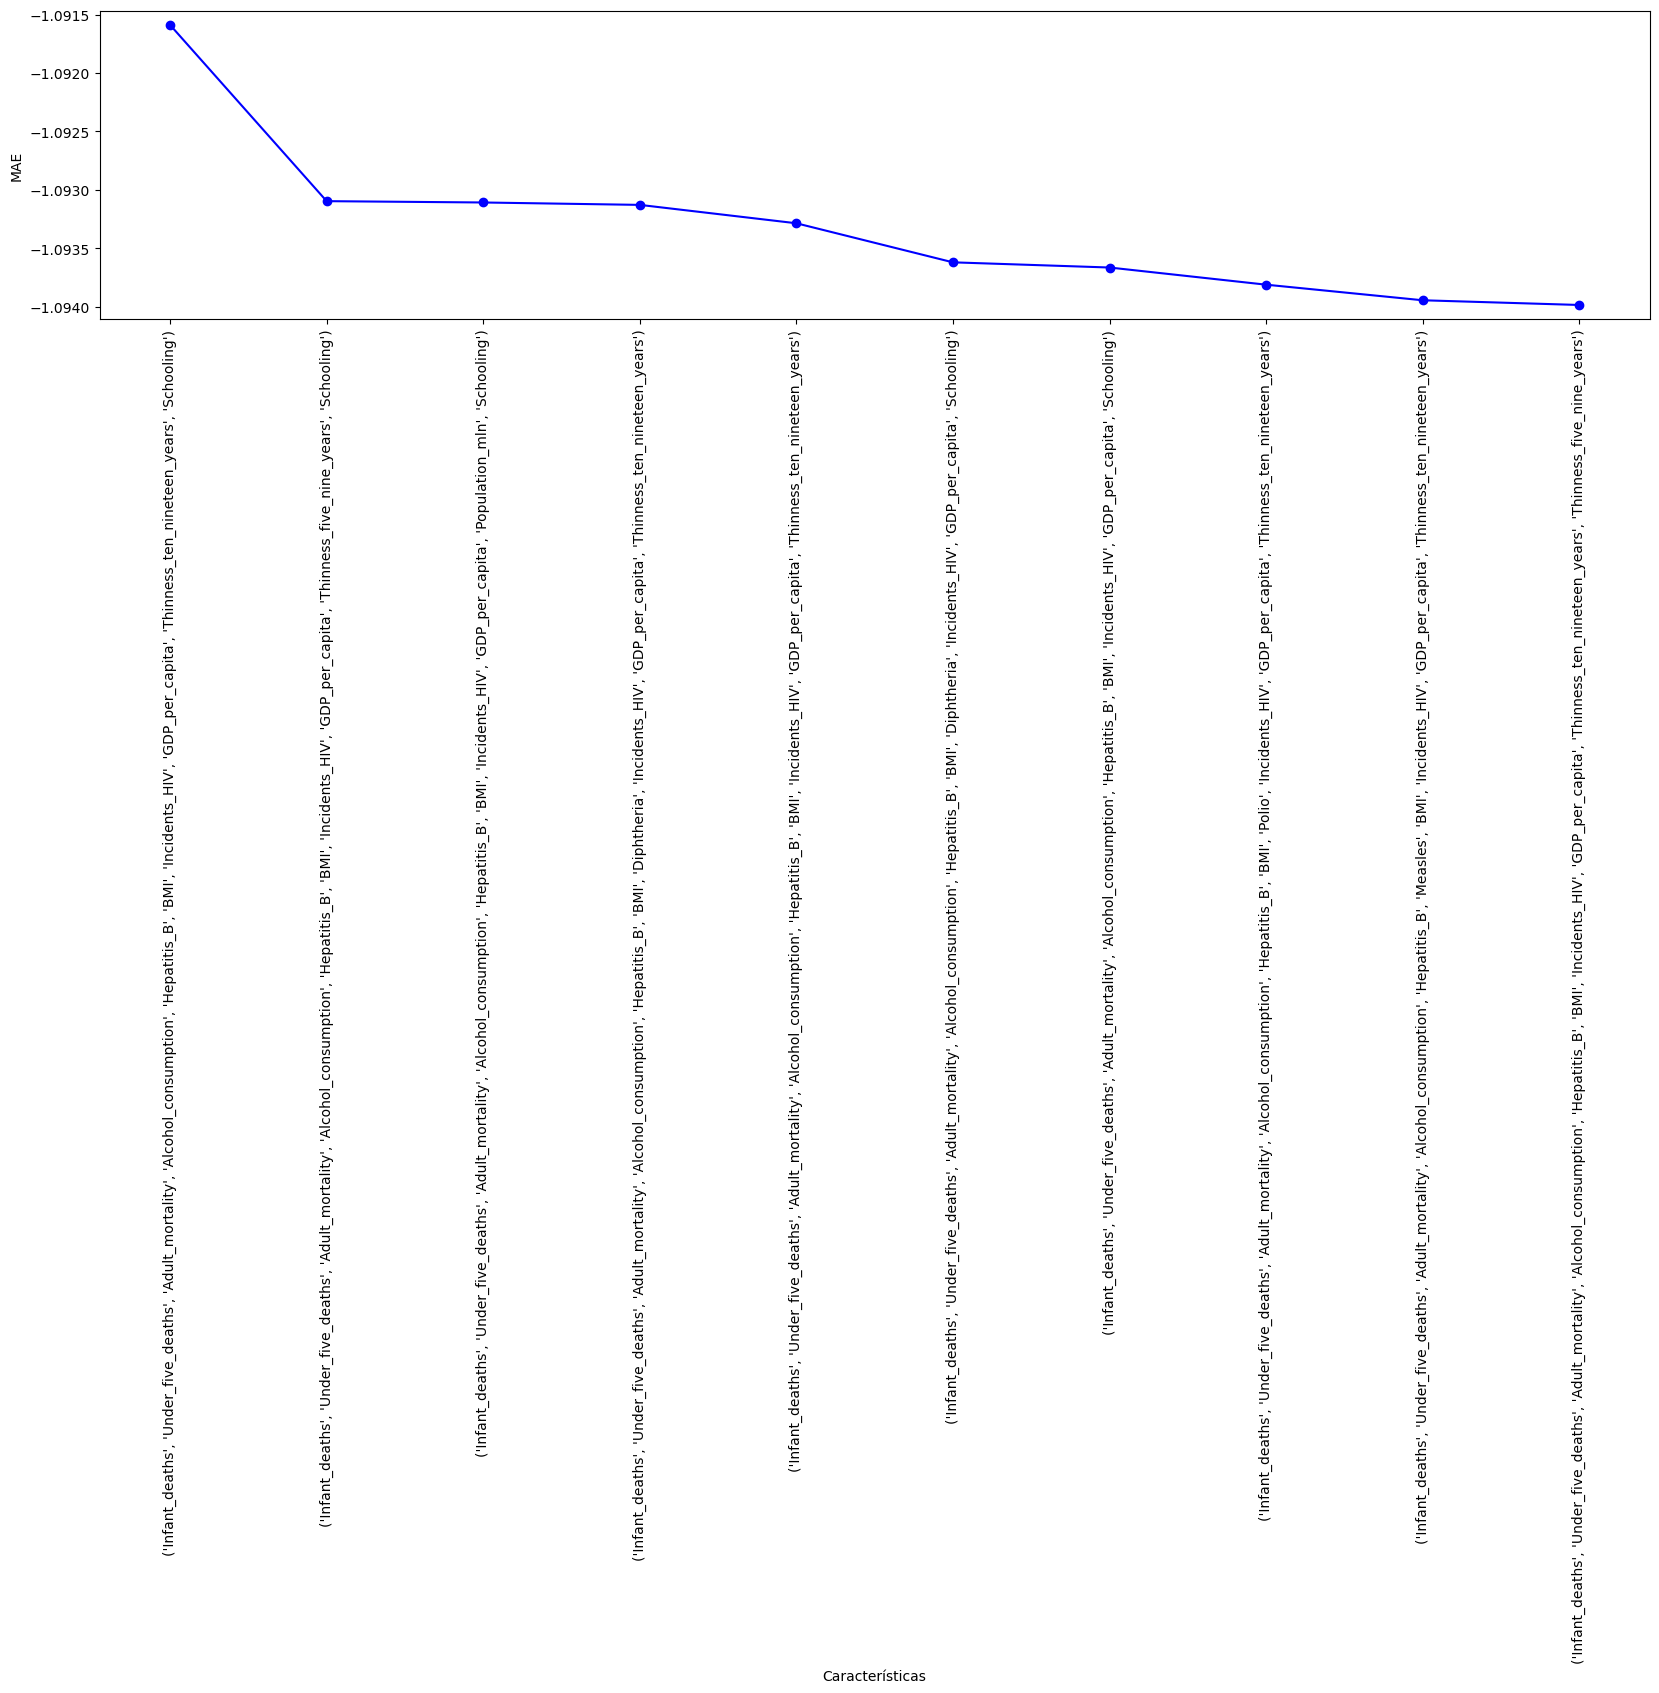

In [102]:
fig = plt.figure(figsize=(20, 4))

plt.plot(
    df_efs_best_10.feature_names.astype(str), 
    df_efs_best_10.avg_score, 
    color='blue', marker='o'
)
plt.ylabel('MAE')
plt.xlabel('Características')

plt.xticks(rotation = 90)

plt.show()

In [98]:
from sklearn.decomposition import PCA
import numpy as np

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(scaled, columns = X.columns)
x_scaled

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,0.068232,0.048068,0.084242,0.073867,0.977011,0.617978,0.650407,0.978022,0.975904,0.003230,0.096713,0.056857,0.173913,0.164912,0.515385
1,0.006603,0.004492,0.012715,0.579183,0.977011,0.943820,0.504065,0.978022,0.975904,0.003692,0.227968,0.033600,0.018116,0.014035,0.661538
2,0.364637,0.294699,0.226415,0.087857,0.551724,0.280899,0.113821,0.648352,0.578313,0.005538,0.008266,0.857477,0.978261,0.978947,0.300000
3,0.227439,0.171608,0.257938,0.317851,0.931034,0.719101,0.447154,0.923077,0.927711,0.035994,0.035611,0.000486,0.202899,0.189474,0.523077
4,0.011739,0.008985,0.012787,0.161724,0.977011,0.887640,0.585366,0.945055,0.939759,0.003230,0.301479,0.005675,0.039855,0.035088,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,0.698459,1.000000,0.361863,0.005148,0.689655,0.606742,0.081301,0.362637,0.216867,0.022150,0.002236,0.008153,0.460145,0.449123,0.000000
2860,0.162142,0.118149,0.277396,0.367096,0.977011,0.977528,0.447154,0.967033,0.951807,0.000461,0.021083,0.001877,0.076087,0.077193,0.615385
2861,0.116654,0.119497,0.127633,0.087297,0.574713,0.955056,0.170732,0.978022,0.975904,0.000461,0.017654,0.013995,0.554348,0.540351,0.707692
2862,0.044754,0.034142,0.230796,0.615557,0.942529,0.955056,0.512195,0.978022,0.951807,0.001846,0.064808,0.002435,0.115942,0.112281,0.769231


In [117]:
pca = PCA(n_components = 10)
pca_model = pca.fit(x_scaled)

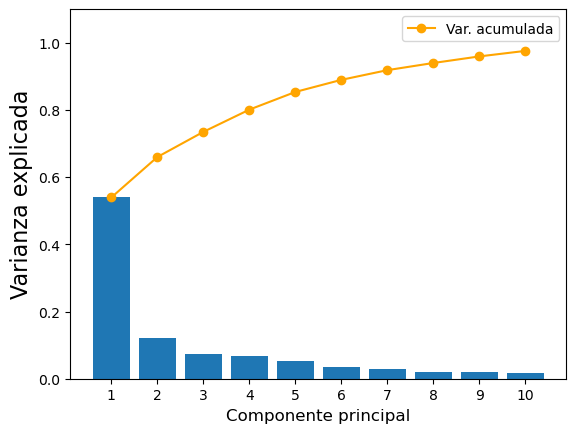

In [119]:
plt.figure()
plt.bar(np.arange(pca_model.n_components_) + 1, pca_model.explained_variance_ratio_)
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
plt.plot(range(1, 11),prop_varianza_acum, marker = 'o', c='orange', label='Var. acumulada')
plt.xticks(np.arange(pca_model.n_components_) + 1)
plt.ylim(0, 1.1)
plt.xlabel('Componente principal', fontsize=12)
plt.ylabel('Varianza explicada', fontsize=16)
plt.legend()
plt.show()

In [121]:
pca_coef = pd.DataFrame(
  data    = pca_model.components_,
  columns = x_scaled.columns,
  index=["pca"+str(x) for x in range(1,11)]
).T.sort_values('pca1', ascending=False)
pca_coef

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
Infant_deaths,0.368898,0.085785,-0.175288,-0.186093,-0.035048,-0.066204,0.138470,-0.056049,-0.187423,0.062440
Under_five_deaths,0.360338,0.117052,-0.213068,-0.186396,-0.038429,-0.096180,0.188171,-0.083774,-0.168219,0.071578
Adult_mortality,0.250767,0.080062,-0.423670,-0.225458,0.145815,0.356869,0.063231,0.171500,0.045002,-0.002492
Thinness_ten_nineteen_years,0.199054,-0.304616,-0.104522,0.434277,-0.194427,0.248088,-0.015054,-0.232042,0.061479,-0.073209
Thinness_five_nine_years,0.194204,-0.294981,-0.101965,0.453904,-0.155595,0.264424,-0.031742,-0.188926,0.044515,-0.108496
Incidents_HIV,0.067476,0.024347,-0.302214,-0.122459,0.122310,0.435288,0.207583,0.088937,0.278635,0.123202
Population_mln,0.015351,-0.046895,0.020309,0.232876,-0.047211,0.038536,-0.106880,0.194064,-0.237376,0.910779
GDP_per_capita,-0.170589,0.174253,0.035290,0.212477,-0.107453,-0.172316,0.836623,-0.194276,0.231143,0.146218
Hepatitis_B,-0.210809,-0.426976,-0.282591,-0.199617,0.230210,-0.138039,0.100080,-0.515215,-0.476175,0.041700
BMI,-0.251943,0.086013,0.273762,-0.307375,0.111064,0.462532,-0.128631,-0.508587,0.260676,0.238982


### Seleccion final de variables

Basado en los analisis previos he decidido deshacerme de las siguientes variables:

Population: No considero que la poblacion total sea un indicador efectivo dado que las variaciones en la misma no necesariamente tienen relacion con la expectativa de vida tanto como se tiene con el espacio disponible (i.e: Un pais puede tener una muy buena calidad de vida pero tener poca poblacion puramente por su territorio disponible)

Thiness_five_year & Thinness_ten_nineteen_years	: Creo que toda la informacion que nos puede presentar esta variable podria ser explicado con otras dos variables que si se van a incluir en el modelo (BMI % death under five years), esto se puede apreciar en el analisis de correlacion dado que las variables mencionadas obtuvieron un indice de correlacion muy alto

Infant deaths: Parecido a las variables previamente mencionadas considero la informacion relevante se encuentra en Under_five_deaths dado que es una edad donde una muerte seria más inesperada.

Measless : Estudiar el grado de inmudidad a una enfermedad puede ser un buen indicador del nivel de salud del pais sin embargo considero que el sarampion no representa tanto un buen indicador con respecto al polio, esto se puede apreciar dado que en practicamente todas las pruebas el polio obtuvo un mejor valor que el sarampion

Mi mayor fuente para seleccion de variables aparte de las pruebas aqui dispuestas fue este [paper](https://www.sciencedirect.com/science/article/abs/pii/S0143622822001576) dado que en este resaltan la importancia de las variables de salud para el estudio de la expectativa de vida
Cabe tambien mencionar que en general la [WHO](https://www.emro.who.int/emhj-volume-26-2020/volume-26-issue-2/analysis-of-life-expectancy-across-countries-using-a-decision-tree.html) ha sido gran fuente para la realizacion de este proyecto

In [5]:
Datos.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [6]:
Datos_limpios=Datos.drop(columns=["Population_mln","Thinness_five_nine_years","Infant_deaths","Thinness_ten_nineteen_years","Measles"])

In [8]:
Datos_limpios.to_csv("../Datos_limpios.csv")